**Converting the data into a pandas DataFrame**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.io import loadmat

In [4]:
mat = loadmat('nirbeer.mat')

In [5]:
type(mat)

dict

In [6]:
mat.keys()

['ytest',
 'ycal',
 'Xcal',
 '__header__',
 '__globals__',
 'Xtest',
 'xaxis',
 '__version__']

In [7]:
Xcal = mat['Xcal']
Xtest = mat['Xtest']
features = mat['xaxis']
ycal = mat['ycal']
ytest = mat['ytest']

In [9]:
series = []
for i in range(Xcal.shape[1]):
    series.append(pd.Series(Xcal[:, i]))
len(series)

926

In [10]:
series[0]

0     0.809228
1     0.804006
2     0.739626
3     0.699460
4     0.702702
5     0.784729
6     1.043639
7     0.771173
8     0.803798
9     0.867852
10    0.840926
11    0.759136
12    0.776312
13    0.906472
14    0.762349
15    0.770354
16    0.709830
17    0.827186
18    0.691581
19    0.842725
20    0.974172
21    0.802244
22    0.792496
23    0.754322
24    0.774357
25    0.756680
26    0.829104
27    0.735422
28    1.001960
29    0.757298
30    0.763956
31    1.002257
32    0.773562
33    0.792364
34    0.968477
35    0.884283
36    0.898152
37    0.830721
38    0.837092
39    0.876266
dtype: float64

In [21]:
data = pd.DataFrame()

In [22]:
features.size

926

In [23]:
for i in range(features.shape[1]):
    data[features[0, i]] = series[i]

In [24]:
data.head()

,400,402,404,406,408,410,412,414,416,418,...,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250
0,0.809228,0.839166,0.857076,0.874258,0.884267,0.898585,0.904815,0.905194,0.903488,0.902187,...,3.679895,3.654557,3.653983,3.714209,3.669642,3.625521,3.647152,3.573585,3.623088,3.679775
1,0.804006,0.826189,0.847709,0.865769,0.877828,0.888752,0.893231,0.894017,0.893292,0.891371,...,3.632740,3.738945,3.601677,3.592955,3.606268,3.657218,3.632019,3.660901,3.635919,3.671539
2,0.739626,0.762493,0.775604,0.782518,0.788167,0.795419,0.795223,0.793878,0.790986,0.785020,...,3.563812,3.622122,3.617598,3.652315,3.590150,3.710362,3.630672,3.653063,3.566837,3.704355
3,0.699460,0.713531,0.724313,0.731107,0.736592,0.735468,0.734549,0.731744,0.726163,0.718673,...,3.583575,3.620621,3.682378,3.681044,3.650404,3.645983,3.633222,3.668727,3.650432,3.687260
4,0.702702,0.716579,0.729258,0.736214,0.741270,0.742020,0.740587,0.737819,0.732221,0.723229,...,3.650906,3.728940,3.614735,3.618842,3.656746,3.622961,3.560679,3.710902,3.653769,3.663029


## Plotting the data

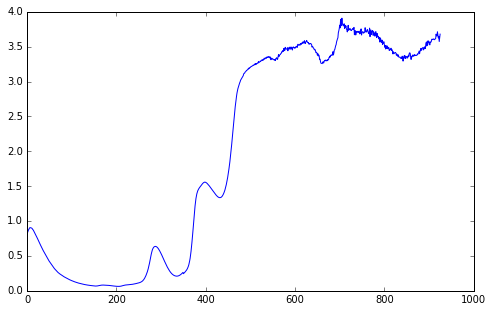

In [25]:
# Plotting  the first data
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.plot(Xcal[0])

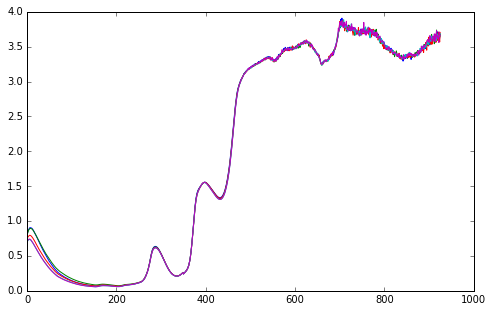

In [26]:
#Plotting the first 5 data points
plt.figure(figsize=(8, 5))
for i in range(5):
    plt.plot(Xcal[i])

### Plotting all data points together

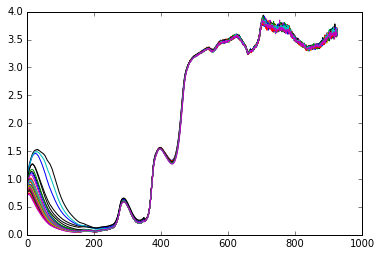

In [27]:
for i in range(Xcal.shape[0]):
    plt.plot(Xcal[i])

### We see that all the 40 beer samples have similar data points at different wavelengths. So we are of the opinion that Linear SVM Regression should be applied with large overfitting.

** Making y_train_true for data. Also building test_data and y_test_true for testing. **

In [28]:
ycal = ycal.ravel()
y_train_true = pd.Series(ycal)

In [29]:
y_train_true.head()

0    4.230000
1    6.020000
2    6.490000
3    8.920000
4    8.979999
dtype: float64

In [30]:
series = []
for i in range(Xtest.shape[1]):
    series.append(pd.Series(Xtest[:, i]))
len(series)

926

In [31]:
test_data = pd.DataFrame()
for i in range(features.shape[1]):
    test_data[features[0, i]] = series[i]

In [32]:
test_data.head()

,400,402,404,406,408,410,412,414,416,418,...,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250
0,0.819094,0.846816,0.864817,0.886129,0.899723,0.910357,0.920238,0.924587,0.924169,0.921422,...,3.629609,3.628768,3.581720,3.651114,3.602773,3.648682,3.613181,3.657350,3.655286,3.597800
1,0.913874,0.955075,0.988696,1.020162,1.044872,1.067709,1.092983,1.107291,1.122817,1.135013,...,3.624469,3.693003,3.671937,3.585491,3.585035,3.656710,3.712139,3.611069,3.602075,3.578345
2,1.005503,1.045450,1.085811,1.127846,1.157784,1.188067,1.219071,1.249703,1.270131,1.296783,...,3.612584,3.712756,3.670530,3.594609,3.566424,3.602968,3.612973,3.664729,3.634739,3.611298
3,0.845709,0.872790,0.901841,0.925214,0.946609,0.956449,0.971971,0.981736,0.986136,0.991593,...,3.628277,3.614616,3.592516,3.597444,3.656557,3.670788,3.644199,3.628403,3.614521,3.553668
4,0.733568,0.755497,0.767425,0.779585,0.785675,0.787037,0.787917,0.785697,0.780111,0.774473,...,3.560951,3.655813,3.581869,3.722736,3.618501,3.641515,3.644560,3.690709,3.638474,3.687253


In [33]:
y_test_true = pd.Series(ytest.ravel())

In [34]:
y_test_true.head()

0     4.24
1     7.14
2    10.07
3    10.39
4    10.51
dtype: float64

## Applying the model

In [35]:
regressor=LinearRegression()

In [36]:
regressor.fit(data,y_train_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
y_prediction=regressor.predict(test_data)

### Finding RMS error

In [24]:
RMSE=np.sqrt(mean_squared_error(y_true=y_test_true,y_pred=y_prediction))

In [43]:
print('RMSE: ', RMSE)

('RMSE: ', 0.73407491062452379)


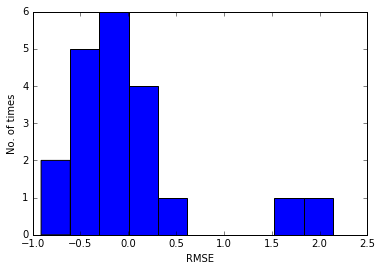

In [46]:
plot_RMSE = y_prediction - y_test_true
plt.xlabel('RMSE')
plt.ylabel('No. of times')
plt.hist(plot_RMSE)
plt.show()